In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parametric_exp(x, a, b):
    return a * np.exp(x/b)

a_true, b_true = 2, 4
xarr = np.linspace(-10, 10)
darr = np.random.rand(xarr.size) * 3
yarr = parametric_exp(xarr, a_true, b_true) + darr
earr = np.random.rand(xarr.size) * 2

In [3]:
%%capture

from EmceeFitter import EmceeChi2Fitter as ECF

ranges = {'a':(0,10), 'b':(0,10)}

ecf_nu = ECF(parametric_exp, xarr, yarr, ranges=ranges)
pars_nu = ecf_nu(nw=200, ns=10000)[0]

ecf_wu = ECF(parametric_exp, xarr, yarr, errors=darr, ranges=ranges)
pars_wu = ecf_wu(nw=200, ns=10000)[0]

In [4]:
print('least squares parameters (without uncertainties): a = {} , b = {}'.format(*np.round(pars_nu,2)))
print('least squares parameters (with uncertainties)   : a = {} , b = {}'.format(*np.round(pars_wu,2)))

least squares parameters (without uncertainties): a = 4.4 , b = 6.39
least squares parameters (with uncertainties)   : a = 2.0 , b = 3.99


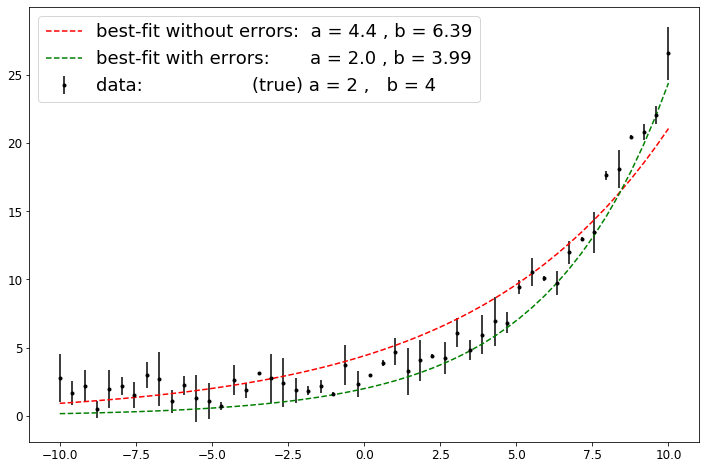

In [9]:
farr_nu = parametric_exp(xarr, *pars_nu)
farr_wu = parametric_exp(xarr, *pars_wu)

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(xarr, farr_nu, 'r--', label='best-fit without errors:  a = {} , b = {}'.format(*np.round(pars_nu,2)));
ax.plot(xarr, farr_wu, 'g--', label='best-fit with errors:       a = {} , b = {}'.format(*np.round(pars_wu,2)));
ax.errorbar(xarr, yarr, yerr=earr, fmt='k.', label='data:                   (true) a = {} ,   b = {}'.format(a_true,b_true));
ax.tick_params(labelsize=12);
ax.legend(fontsize=18);